In [13]:
# er ruw doorgaan
# structuur creeeren
# preparatie en visualisatie: donderdag
# predicties op 3 niveaus
    #pred 1 vrijdag
    #pred 2 zaterdag
    #pred 3 zondag
# uitschrijven
# wat kan beter

#maandag laten nalezen door Ines en alles mergen naar Word met hier en daar een aanpassing, vervolgens indienen. Dan nog CC en de rest van de week focus op ML.


#short term=1, mid term=2tot3, long term=meer, hoogste onzekerheid
#lijstje maken

Dag Tybo, voor de paper verwacht ik voor elke oefening de volgende zaken: inleiding, beschrijving van de data, welke zaken zijn je opgevallen?, welke modellen heb je uitgeprobeerd, wat waren de resultaten?, wat zou je aanraden op korte, midellange en lange termijn?, hoe zou je eventueel je modellen kunnen verbeteren?. Voor de tweede oefening hoef je niet per se al modellen uitgeprobeerd te hebben maar kan een uitgebreid vooronderzoek naar de data voldoende zijn. Je mag veel visualizeringen gebruiken om elke stap duidelijk te maken in je paper. Er is geen minimum of maximum voor de paper maar door het feit dat er veel afbeeldingen zijn, komen veel studenten makkelijk op 15-20 pagina’s. Alles hangt af van hoe je die afbeeldingen gebruikt natuurlijk dus staar je zeker niet blind op dit aantal. Finaal, vergeet zeker niet je code en Jupyter Notebooks door te sturen om je werk aan te tonen. Mocht je nog vragen hebben, aarzel zeker niet om het te na te vragen!

In [25]:
#deze stijl gebruiken? plt.style.use('ggplot')

#vertical lines / horizontal lines
# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline('4', color='green', linestyle='--')



In [1]:
%%script "C:\Users\Glenn.Herpoelaert\AppData\Local\Programs\Python\Python37\python.exe"
import sys
print(sys.version)

3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


In [2]:
#beter: https://www.kaggle.com/allen21huang/time-series-analysis-of-sunspots
#https://www.kaggle.com/granjithkumar/arima-time-series-forecasting-with-python

#https://www.r-bloggers.com/2018/04/time-series-deep-learning-forecasting-sunspots-with-keras-stateful-lstm-in-r/

#good stuff:
#https://www.kaggle.com/allen21huang/time-series-analysis-of-sunspots

#importeren van packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import csv
import datetime
import warnings
import statsmodels.api as sm   
import tensorflow as tf
from tensorflow import keras
from itertools import product    
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import dates as mpl_dates

#update sns
#import sys
#!{sys.executable} -m pip install seaborn

# The Data

In [23]:
#df_sunspots = pd.read_csv('sunspots.csv')
df_sunspots = pd.read_csv('sunspots.csv',parse_dates=['Date'],index_col='Date')


# Data exploration and preparation

In [24]:
#exploring the datatypes
df_sunspots.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3235 entries, 1749-01-31 to 2018-07-31
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3235 non-null   int64  
 1   Monthly Mean Total Sunspot Number  3235 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 75.8 KB


> We can see that the dataset has a limited amount of colums. 2 columns are numeric (int and float) and 1 column is an object. The first column also does not have a columnname. The dataset contains 325 rows. We don't see any missings.

In [25]:
df_sunspots.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


> We see:
- one column with an autonumner: not adding any value
- a date witch ends each time at the end of the month
- a numerical colum with floats with the monthly mean total sunspot number

In [26]:
df_sunspots.tail()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
2018-03-31,3230,2.5
2018-04-30,3231,8.9
2018-05-31,3232,13.2
2018-06-30,3233,15.9
2018-07-31,3234,1.6


> The dataset starts on Januari 1749 and goes until July 2018.

> The first column is a surrogate key with an autonumber this column runs parallel with the index and may be deleted.

In [27]:
#verwijderen van de 'autonumber' kolom
df_sunspots.drop('Unnamed: 0',axis=1, inplace =True)


In [28]:
df_sunspots.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [29]:
#renaming columns
df_sunspots.columns = ['Monthly_mean_total_sunspots']

In [30]:
#statistische info bekijken mbt sunspots
df_sunspots.describe()

,Monthly_mean_total_sunspots
count,3235.000000
mean,82.481082
std,67.805190
min,0.000000
25%,24.750000
50%,68.300000
75%,122.900000
max,398.200000


> het minimum gemiddeld aantal sunspots per maand gaat van 0 tot maximaal 398.2

In [31]:
#omzetten van de Data kolom: van object naar datetime object

#df_sunspots['date']=pd.to_datetime(df_sunspots['date']) 
#print(type(df_sunspots.date))

In [32]:
#we zetten de date colom als index
#df_sunspots = df_sunspots.set_index('date') 

In [33]:
#df_sunspots.index

In [34]:
#df_sunspots.head()

> We hebben nu een dataset met de datum als index en het gemiddeld totale aantal sunspots als feature

In [35]:
#range tussen min en max
naive_forecast.monthly_mean_total_sunspots.max() - naive_forecast.monthly_mean_total_sunspots.min()

NameError: name 'naive_forecast' is not defined

> De range tussen de minimumwaarde en de maximumwaarde is vrij groot (359.4). Dit speelt in de hand om bij de evaluatie van de modellen eerder te gaan kijken naar de Mean absolute error om zo minder rekening te houden met grote fouten.

# Data visualisation

In [36]:
df_sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3235 entries, 1749-01-31 to 2018-07-31
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Monthly_mean_total_sunspots  3235 non-null   float64
dtypes: float64(1)
memory usage: 50.5 KB


Text(0, 0.5, 'Monthly mean total sunspots')

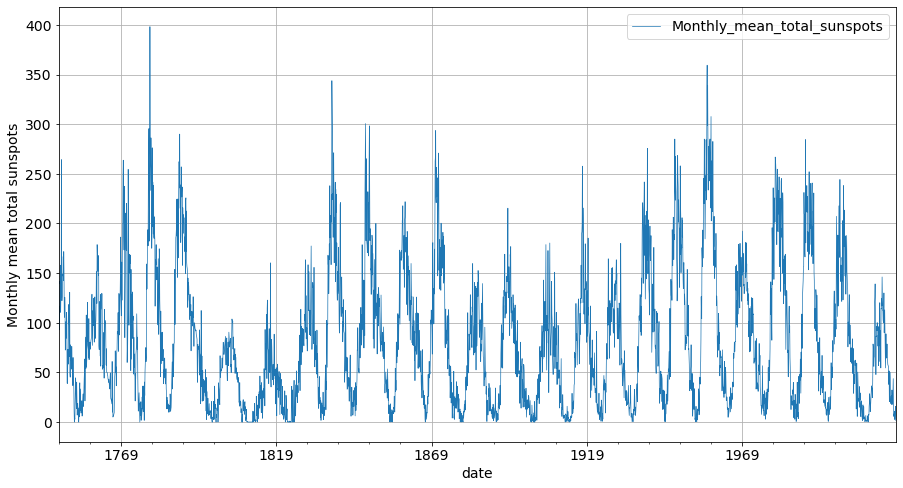

In [37]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = df_sunspots.plot( grid=True,linewidth=0.7)

ax.plot()
    
ax.set_xlabel("date")
ax.set_ylabel("Monthly mean total sunspots")

#### Vaststellingen

> We hebben dus te maken met een univariate time series omdat we in de dataset slechts 1 response variabele zien.
> Uit bovenstaande visualisatie kunnen we niet direct een opwaartse of neerwaartse trendlijn afleiden. 

> Seasonality: online (https://nl.wikipedia.org/wiki/Zonnevlek) is te vinden dat er gemiddeld om de 11 jaar en periode met een piek is. Dergelijke seasonality zien we ook duidelijk op de plot. Het is wel moeilijk om te zien of het inderdaad telkens over 11 jaar (in het geval van de dataset 132 maanden) gaat. Dit wordt verder nog bekeken. 

> Auto correlatie: verdere analyse nodig mbhv het Arima model

> Gemiddelde van 0? constante variantie? Deze zaken zijn nog niet duidelijk. 


#### Seasonality in detail bekijken

<Figure size 864x432 with 0 Axes>

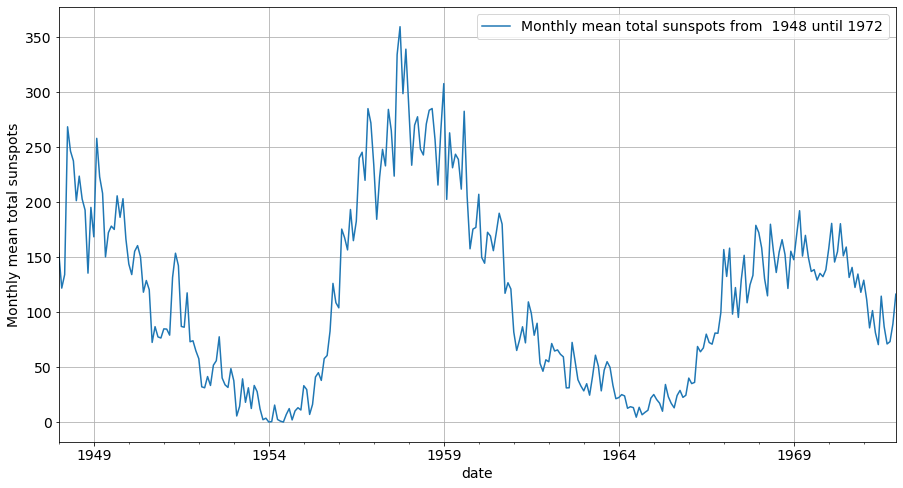

In [46]:
fig = plt.figure(figsize = (12,6))

df_ranged = df_sunspots.loc[(df_sunspots.index > '1948-01-01') & (df_sunspots.index < '1972-01-01')]

# Plot the predictions
rcParams['figure.figsize'] = 15, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = df_ranged.plot( grid=True)

# Plot the predictions
ax.plot()
    
ax.set_xlabel("date")
ax.set_ylabel("Monthly mean total sunspots")
ax.legend(['Monthly mean total sunspots from  1948 until 1972'])

> We zien inderdaad dat er rond 1955 een dal is die zich pas rond 1966 terug voordoet. Dit ligt in lijn met de cyclus van 11 jaar.

<Figure size 864x432 with 0 Axes>

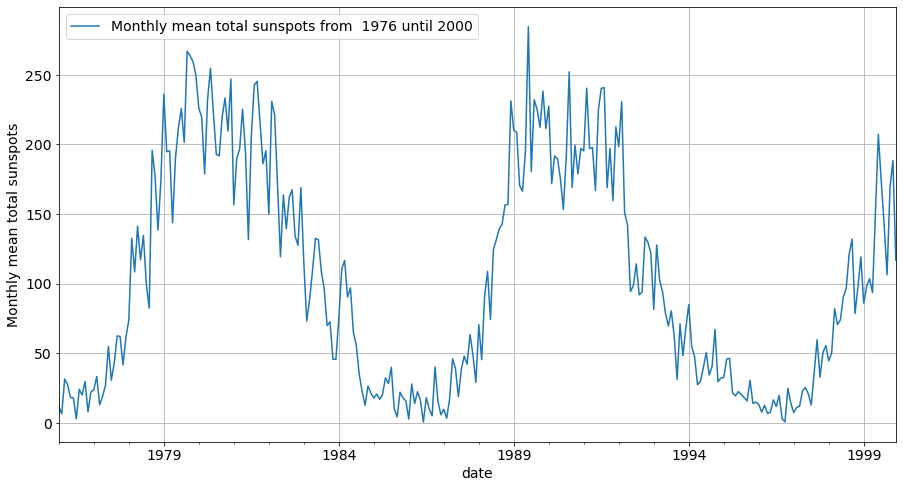

In [47]:
fig = plt.figure(figsize = (12,6))

df_ranged = df_sunspots.loc[(df_sunspots.index > '1976-01-01') & (df_sunspots.index < '2000-01-01')]

# Plot the predictions
rcParams['figure.figsize'] = 15, 8 # width 10, height 8
plt.rcParams.update({'font.size': 14})

ax = df_ranged.plot(grid=True)

# Plot the predictions
ax.plot()
    
ax.set_xlabel("date")
ax.set_ylabel("Monthly mean total sunspots")
ax.legend(['Monthly mean total sunspots from  1976 until 2000'])

> We zien inderdaad dat er rond 1986 een dal is die zich pas rond 1997 terug voordoet. Dit ligt in lijn met de cyclus van ongeveer 11 jaar (132 maanden).

#### Timeseries decomposition

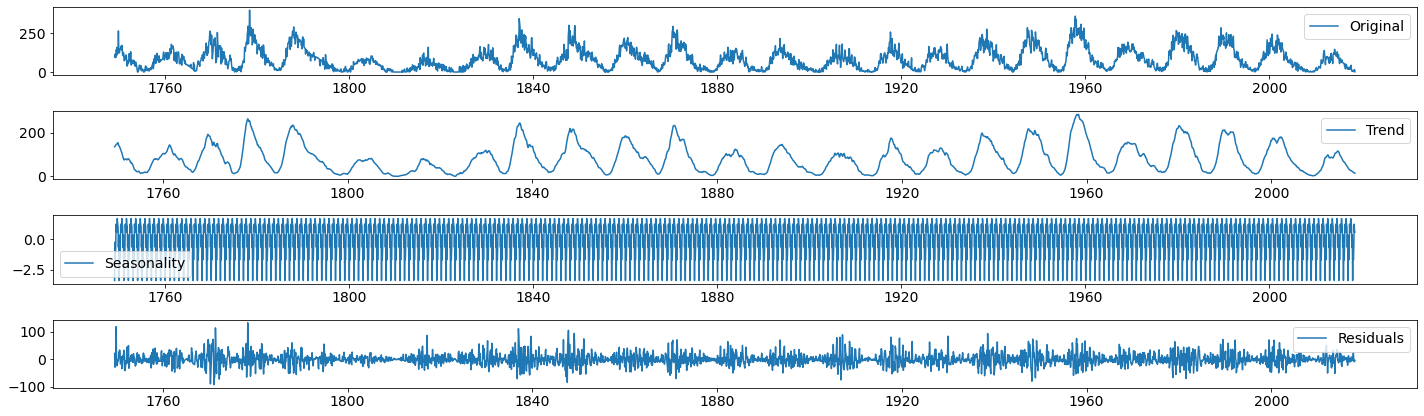

In [40]:
#additief model
plt.figure(figsize=(20, 6))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sunspots,model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_sunspots, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

###### Seasonality:
> In bovenstaande output zien we data bij de seasonality. De range is zeer beperkt (-4,2) en er is ook geen evolutie te zien maar eerder een repititief patroon.
###### Trend:
> Er is duidelijke een trend zichtbaar. Opvallend is dat er veel variatie kan zijn tussen de grootte van de verschillende pieken/dallen. 
###### Noise:
> We zien ook dat er noise in de dataset is (volgens de gebruikte package).

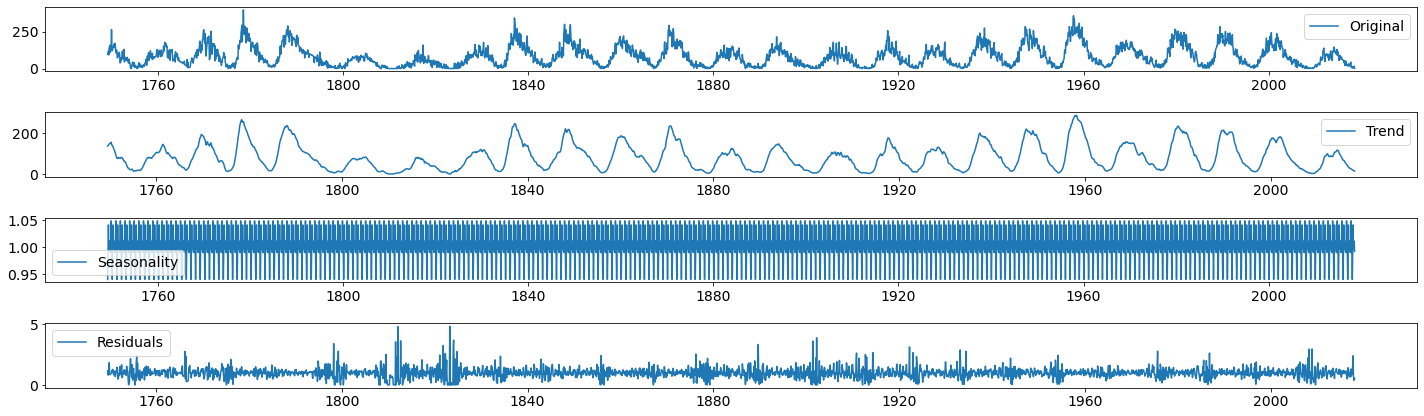

In [42]:
#multiplicatief model
#0 waarden vervangen door een zeer klein getal om alsnog het model te kunnen bekijken
df_sunspots_mp = df_sunspots.copy()
df_sunspots_mp[df_sunspots.Monthly_mean_total_sunspots ==0] = 0.0000000000001

plt.figure(figsize=(20, 6))
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sunspots_mp,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_sunspots_mp, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

> Het multiplicatieve model zorgt niet voor andere inzichten dan hetgeen we al bij het additieve model hebben vastgesteld.

#### Stationarity Check

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#dit er bij zetten?

The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

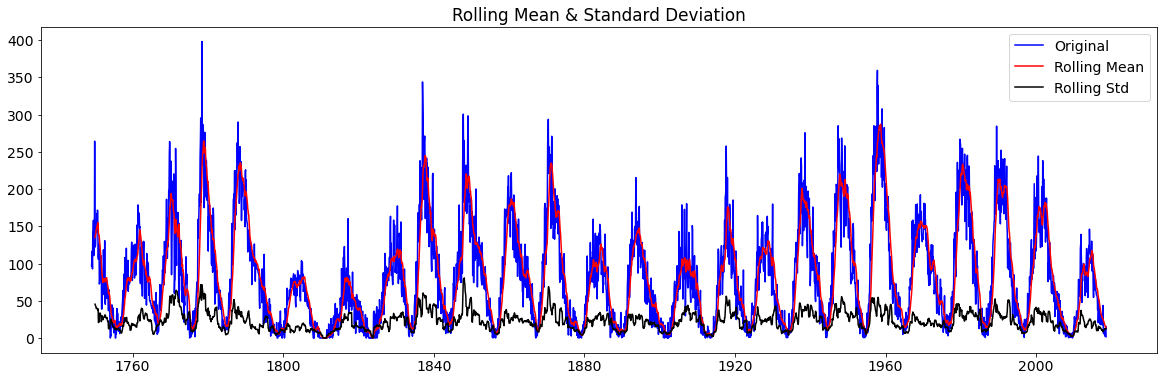

Results of Dickey-Fuller Test:
Test Statistic                -1.049256e+01
p-value                        1.137033e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.206000e+03
Critical Value (1%)           -3.432391e+00
Critical Value (5%)           -2.862442e+00
Critical Value (10%)          -2.567250e+00
dtype: float64


In [45]:
plt.figure(figsize=(20, 6))
test_stationarity(df_sunspots)

> Uit de resultaten van de Dickey-Fuller test zien we dat de p-waarde sterk onder het significantieniveau van 0.05 ligt. We kunnen dus niet aannemen dat er seasonality in de dataset zit. Dit valt ook visueel af te leiden uit de plot waar  de rolling mean en rolling std rond dezelfde waarden blijven schommelen. We hebben dus een stationaire dataset en kunnen zo direct overgaan naar het modeleren.

### Train/test split

In [11]:
#train / test data selecteren
train_val_size = len(df_sunspots)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(train_val_size * 0.7)
df_trainingdata = df_sunspots[0:TrainingSize]
df_testdata = df_sunspots[TrainingSize:train_val_size]

In [12]:
#controleren of training data en test data elkaar effectief opvolgen
df_trainingdata.index.values.max(), df_testdata.index.values.min() 

(numpy.datetime64('1937-08-31T00:00:00.000000000'),
 numpy.datetime64('1937-09-30T00:00:00.000000000'))

In [13]:
df_testdata.shape

(971, 1)

## Naive Forecast (as the baseline)

> We bekijken een naive forecast met 1 als horizon.

In [14]:
#te testen, met behoud van index
#------------------------------------------

naive_forecast = df_sunspots.copy()
#naive_forecast = naive_forecast[TrainingSize:-1].copy()
naive_forecast['pred'] = naive_forecast.monthly_mean_total_sunspots.shift(1)
naive_forecast = naive_forecast[1:-1]
naive_forecast.head()


AttributeError: 'DataFrame' object has no attribute 'monthly_mean_total_sunspots'

In [15]:
naive_forecast = df_sunspots.reset_index()
naive_forecast = naive_forecast[TrainingSize:-1].copy()
naive_forecast['pred'] = naive_forecast['monthly_mean_total_sunspots'].shift(1)
naive_forecast = naive_forecast[1:]
naive_forecast.head()



KeyError: 'monthly_mean_total_sunspots'

In [16]:
#inzoomen om het verschil beter te zien
df_ranged_naive = naive_forecast[(naive_forecast['date'] > '1976-01-01') & (naive_forecast['date'] < '1984-01-01')]


plt.plot( 'date', 'monthly_mean_total_sunspots', data=df_ranged_naive, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=0.7)
plt.plot( 'date', 'pred', data=df_ranged_naive, marker='', color='coral', linewidth=0.7)
# show legend
plt.legend()

# show graph
plt.show()




KeyError: 'date'

In [17]:
print('Mean absolute error:',keras.metrics.mean_absolute_error(naive_forecast.monthly_mean_total_sunspots, naive_forecast.pred).numpy())
print('Mean squared errror: ', keras.metrics.mean_squared_error(naive_forecast.monthly_mean_total_sunspots, naive_forecast.pred).numpy())
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(naive_forecast.monthly_mean_total_sunspots, naive_forecast.pred)
print('Mean absolute percentage error: ', m.result().numpy())



AttributeError: 'DataFrame' object has no attribute 'monthly_mean_total_sunspots'

> We werken hieronder met de MAE, die 19.89 bedraagt, als baseline. Zo gaan we grote errors minder gaan afstraffen tov MSE als baseline.

> Hieronder gaan we eerst nog even verder werken op de Naive forecast. Eerst met een iets hogere horizon om te zien of de MAE daadwerkelijk stijgt zoals je zou verwachten als bij een Naive forecast. Daarna gaan we de horizon zetten op 11 jaar, 132 maanden. Deze forecast is dus gebaseerd op de generieke info mbt sunpots die we online vinden, namelijk een cyclus van 11 jaar. Hier zouden we verwachten dat de MAE beter is dan bij een horizon die tussen 1 en 132 ligt.

In [18]:
#MAE bij een ruimere horizon
H = 132//2
naive_forecast_hz_l = df_sunspots.reset_index()
naive_forecast_hz_l = naive_forecast_hz_l[TrainingSize:-1].copy()
naive_forecast_hz_l['pred'] = naive_forecast_hz_l['monthly_mean_total_sunspots'].shift(periods=H)
naive_forecast_hz_l = naive_forecast_hz_l[H:]
#naive_forecast_hz_l.head()


KeyError: 'monthly_mean_total_sunspots'

In [19]:
#inzoomen om het verschil beter te zien
df_ranged_naive_hz_l = naive_forecast_hz_l[(naive_forecast_hz_l['date'] > '1976-01-01') & (naive_forecast_hz_l['date'] < '1984-01-01')]


plt.plot( 'date', 'monthly_mean_total_sunspots', data=df_ranged_naive_hz_l, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=0.7)
plt.plot( 'date', 'pred', data=df_ranged_naive_hz_l, marker='', color='coral', linewidth=0.7)
# show legend
plt.legend()

# show graph
plt.show()




KeyError: 'date'

In [20]:
print('Mean absolute error:',keras.metrics.mean_absolute_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy())
print('Mean squared errror: ', keras.metrics.mean_squared_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy())
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred)
print('Mean absolute percentage error: ', m.result().numpy())



AttributeError: 'DataFrame' object has no attribute 'monthly_mean_total_sunspots'

> Bij een horizon van 66 maanden (132/2) zien we dat de MAE flink stijgt naar 121. 

In [579]:
#MAE bij een horizon van 11 jaar (132 maanden)
H = 132
naive_forecast_hz_l = df_sunspots[TrainingSize:-1].copy()
naive_forecast_hz_l['pred'] = naive_forecast_hz_l['monthly_mean_total_sunspots'].shift(periods=H)
naive_forecast_hz_l = naive_forecast_hz_l[H:]
#naive_forecast_hz_l.head()


In [580]:
print('Mean absolute error:',keras.metrics.mean_absolute_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy())
print('Mean squared errror: ', keras.metrics.mean_squared_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy())
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred)
print('Mean absolute percentage error: ', m.result().numpy())



Mean absolute error: 45.60202863961814
Mean squared errror:  3814.184355608591
Mean absolute percentage error:  144510910.0


> Als we de horizon op 132 maanden zetten, dan zien we dat de MAE weer daalt tov een horizon van 66 maanden. Dit is wel nog steeds meer dan dubbel zo veel  als bij een horizon van 1 maand.

In [581]:
predsMAE=[]
predsMSE=[]
for i in range(1,132*4):
    H=i
    naive_forecast_hz_l = df_sunspots[TrainingSize:-1].copy()
    naive_forecast_hz_l['pred'] = naive_forecast_hz_l['monthly_mean_total_sunspots'].shift(periods=H)
    naive_forecast_hz_l = naive_forecast_hz_l[H:]
    predMAE = keras.metrics.mean_absolute_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy()
    predsMAE.append(predMAE)
    predMSE = keras.metrics.mean_squared_error(naive_forecast_hz_l.monthly_mean_total_sunspots, naive_forecast_hz_l.pred).numpy()
    predsMSE.append(predMSE)
    

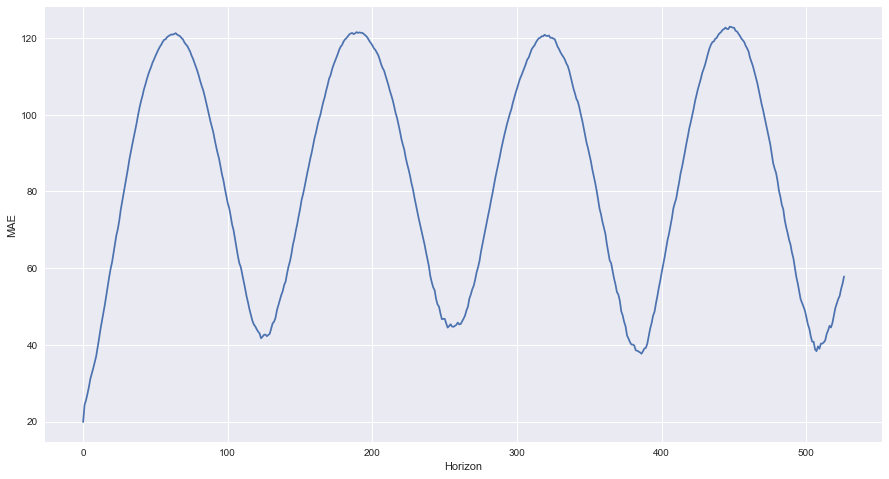

In [582]:
plt.ylabel('MAE')
plt.xlabel('Horizon')
plt.plot(predsMAE)
#plt.plot(predsMSE)

> We zien duidelijk sinusoidaal patroon. De laagste MAE ligt bij de start, maaar vanaf dant zien we repetitief de laagste MAE om ongeveer de 132 maanden (11 jaar).

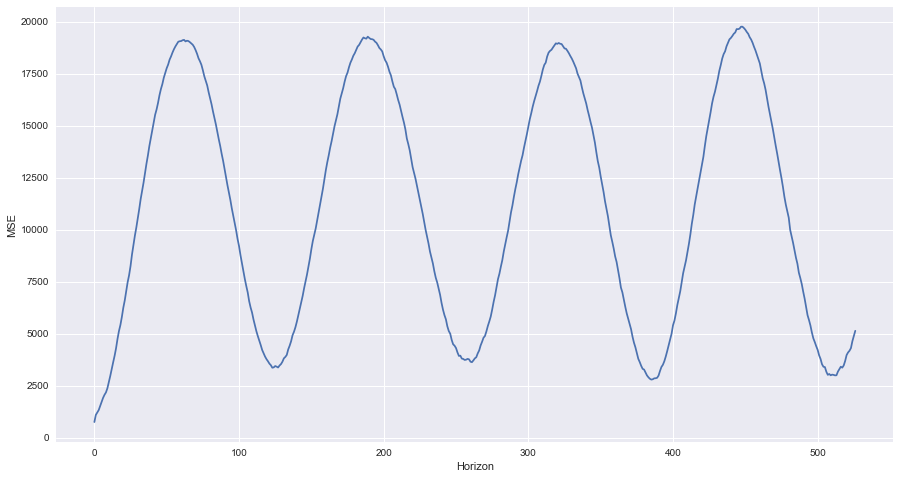

In [583]:
plt.ylabel('MSE')
plt.xlabel('Horizon')
plt.plot(predsMSE)

> Bij de MSE zien we een gelijkaardig patroon als bij de MAE, het grote verschil is dat de range tussen de laagste en de hoogste waarden veel groter is. Dit is vrij logisch gezien er hier wordt gewerkt met het kwadraat en er ook grote errors zijn.

### Moving Average Model

In [584]:
df_moving_avg_train = df_sunspots[TrainingSize-30:].copy()
sunspots = np.array(df_moving_avg_train['monthly_mean_total_sunspots'])

#we zetten de lag op 30 dagen
window_size = 30
preds_moving_avg = []


for time in range(window_size,len(sunspots)):
    preds_moving_avg.append(sunspots[time-window_size:time].mean())



In [ ]:
#rolling van datacamp: vergelijken met de oplossing van hieronder, ook even naar de andere 
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()


# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'] )

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [5]:
#dit eens in de plaats proberen?: rolling met ook std en hernoeming via suffix
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()
##########################################################################
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats.add_suffix('_360'))

# Plot stats
stats.plot(subplots=True);
plt.show()

NameError: name 'data' is not defined

In [585]:
df_preds = pd.DataFrame(preds_moving_avg, columns = ['preds_moving_avg'])
print(df_preds.shape)
print(df_testdata.shape)

(971, 1)
(971, 1)


In [586]:
moving_avg_forecast = df_moving_avg_train[window_size:].copy()
moving_avg_forecast = moving_avg_forecast.reset_index()

In [587]:
moving_avg_forecast['lag_preds'] = df_preds['preds_moving_avg']

In [588]:
moving_avg_forecast.head()

,date,monthly_mean_total_sunspots,lag_preds
0,1937-09-30,167.9,129.653333
1,1937-10-31,208.2,133.966667
2,1937-11-30,123.9,140.226667
3,1937-12-31,147.9,142.843333
4,1938-01-31,164.0,145.233333


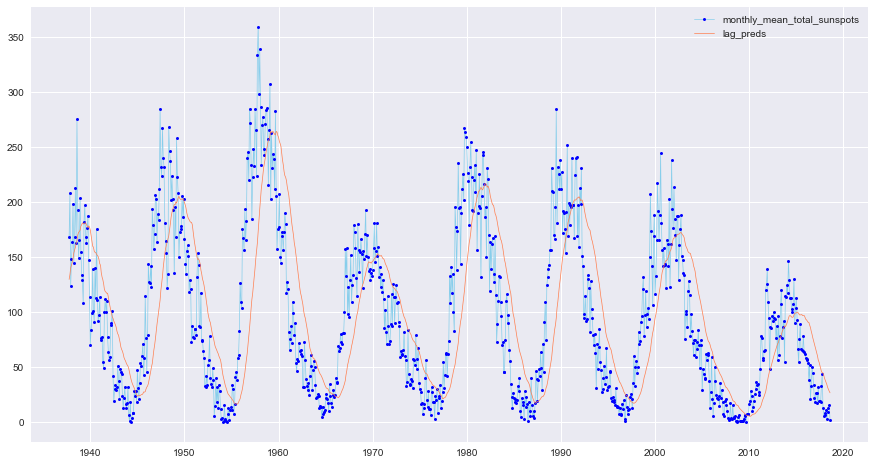

In [591]:
#moving average
plt.plot( 'date', 'monthly_mean_total_sunspots', data=moving_avg_forecast, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=0.7)
plt.plot( 'date', 'lag_preds', data=moving_avg_forecast, marker='', color='coral', linewidth=0.7)
# show legend
plt.legend()

# show graph
plt.show()




In [592]:
print('Mean absolute error:',keras.metrics.mean_absolute_error(moving_avg_forecast.monthly_mean_total_sunspots, moving_avg_forecast.lag_preds).numpy())
print('Mean squared errror: ', keras.metrics.mean_squared_error(moving_avg_forecast.monthly_mean_total_sunspots, moving_avg_forecast.lag_preds).numpy())
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(moving_avg_forecast.monthly_mean_total_sunspots, moving_avg_forecast.lag_preds)
print('Mean absolute percentage error: ', m.result().numpy())



Mean absolute error: 44.02041881222108
Mean squared errror:  3161.010193454629
Mean absolute percentage error:  6560408.5


> Als we kijken naar de MAE, dan hebben we een slechter model dan bij een naive forecast met een horizon van 1. Het model is wel net iets beter dan een naive forecast met een horizon van 132. Maar het is die eerste naive forecast die we als baseline nemen.

> Hieronder gaan we via differencing de seasonality (en de trend) verwijderen om tot een beter moving average model te komen.

## Arima Model

In [593]:
df_timeseries_arima = df_sunspots
df_timeseries_arima = df_timeseries_arima.set_index(df_timeseries_arima['date'])
del df_timeseries_arima['date']
df_timeseries_arima.head()

KeyError: 'date'

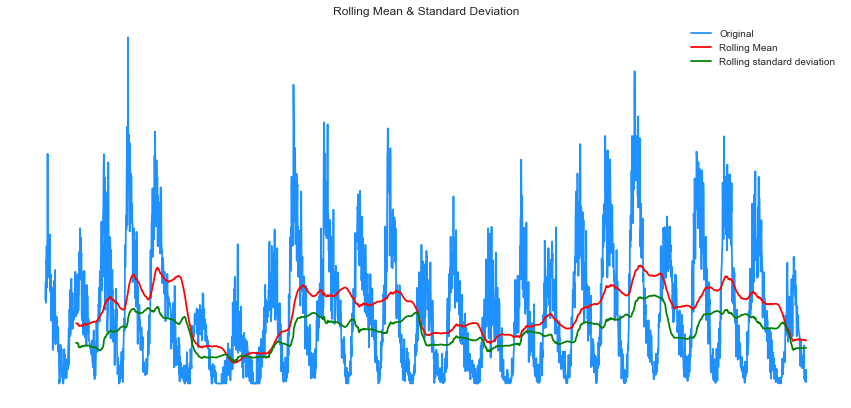

In [594]:
#window zetten op 11 jaar
size = 132

plt.figure(figsize=(15, 7))
#plt.style.use('seaborn')
# rolling statistics
rol_mean = df_timeseries_arima.rolling(window=size).mean()
rol_std = df_timeseries_arima.rolling(window=size).std()
plt.plot(df_timeseries_arima, color='dodgerblue', label='Original')
plt.plot(rol_mean, color='red', label='Rolling Mean')
plt.plot(rol_std, color='green', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
# let the axis off for convenience
plt.axis('off')
plt.show()

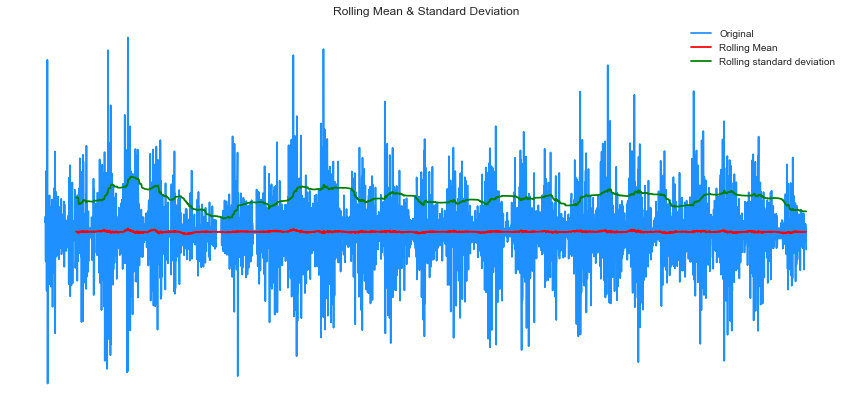

In [595]:
#effect van differencing visualiseren
df_timeseries_arima_diff = df_timeseries_arima.diff(1)

#window zetten op 11 jaar
size = 132

plt.figure(figsize=(15, 7))
#plt.style.use('seaborn')
# rolling statistics
rol_mean = df_timeseries_arima_diff.rolling(window=size).mean()
rol_std = df_timeseries_arima_diff.rolling(window=size).std()
plt.plot(df_timeseries_arima_diff, color='dodgerblue', label='Original')
plt.plot(rol_mean, color='red', label='Rolling Mean')
plt.plot(rol_std, color='green', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
# let the axis off for convenience
plt.axis('off')
plt.show()

> We hebben bij de data exploratie al gezien dat het gaat om stationaire data (p < significantieniveau voor de Augmenten Dickey Fuller test). Dit wilt zeggen dat we voor het Arima model geen differencing moeten toepassen.

##### Partial Autocorrelation (PACF) plot

In [7]:
#autocorrelation: correlation of a single timeseries with a lagged copy of itself
#negative autocor: mean reverting
#positive autocor: trend following = zo benoemd

#ook eens met dit doen: Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to suppress the confidence interval.

plot_acf(HRB,alpha=0.05)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(timeseries,ax=ax, lags = 200, color="dodgerblue");

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(timeseries,ax=ax, lags = 200, color="dodgerblue")
plt.show()

In [ ]:
####datacamp:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

#shady blue is het confidence interval

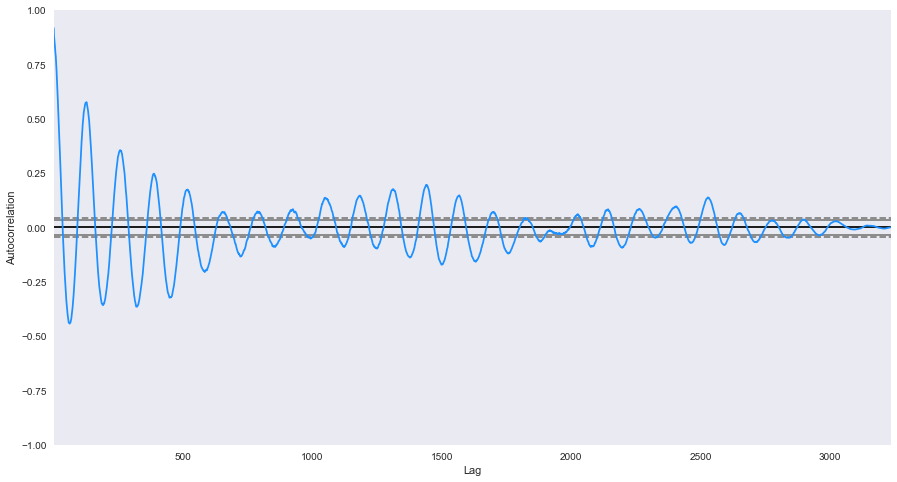

In [597]:
autocorrelation_plot(timeseries, color='dodgerblue')

> We zien dat de autocorrelatie coëfficient convergeert naar 0 naarmate dat de tijd rihting 3000 gaat, wat te verwachten valt bij stationaire timeseries.



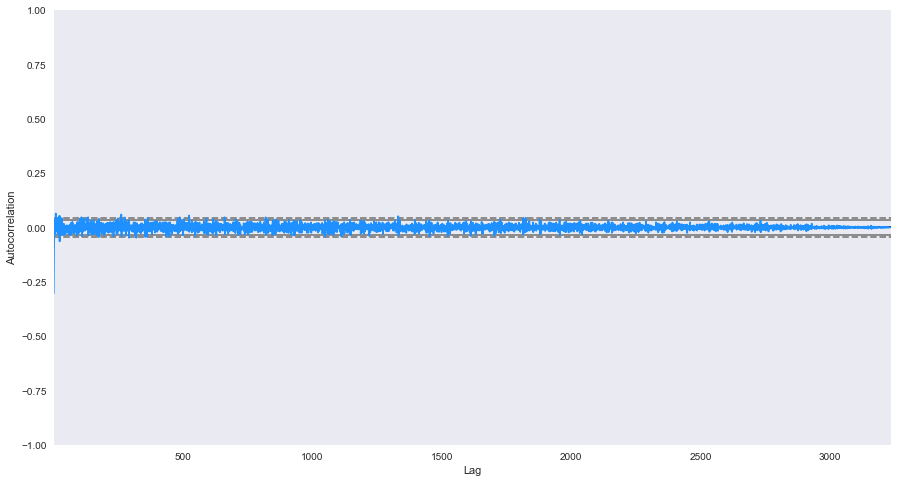

In [598]:
#check met differencing

autocorrelation_plot(timeseries.diff(1)[1:], color='dodgerblue')


> Als we met differencing zouden werken, dan zien we dat we zouden gaan overfitten.

In [456]:
#resampling tot jaar niveau

df_train_year = df_trainingdata.set_index(df_trainingdata['date'])
del df_train_year['date']

df_test_year = df_testdata.set_index(df_testdata['date'])
del df_test_year['date']



df_train_year = df_train_year.resample('A').sum()
df_test_year = df_test_year.resample('A').sum()
df_train_year.head()


,monthly_mean_total_sunspots
date,
1749-12-31,1618.5
1750-12-31,1668.0
1751-12-31,953.3
1752-12-31,956.0
1753-12-31,613.5


In [457]:
Qs = range(0, 3)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_train_year['monthly_mean_total_sunspots'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 11)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [458]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:          monthly_mean_total_sunspots   No. Observations:                  189
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 11)   Log Likelihood               -1269.917
Date:                              Thu, 29 Apr 2021   AIC                           2551.833
Time:                                      09:06:09   BIC                           2570.890
Sample:                                  12-31-1749   HQIC                          2559.562
                                       - 12-31-1937                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5495      0.051     30.089      0.000       1.449       1.650
ar.L2         -0.8810      0.045    -19.494      0.000      -0.970      -0.792
ma.L1         -1.3972      0.081    -17.335      0.000      -1.555      -1.239
ma.L2          0.5174      0.082      6.308      0.000       0.357       0.678
ma.S.L11      -0.9919      1.007     -0.985      0.325      -2.965       0.981
sigma2      8.548e+04   8.29e+04      1.031      0.303   -7.71e+04    2.48e+05
===================================================================================
Ljung-Box (Q):                       41.62   Jarque-Bera (JB):                13.96
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.42
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

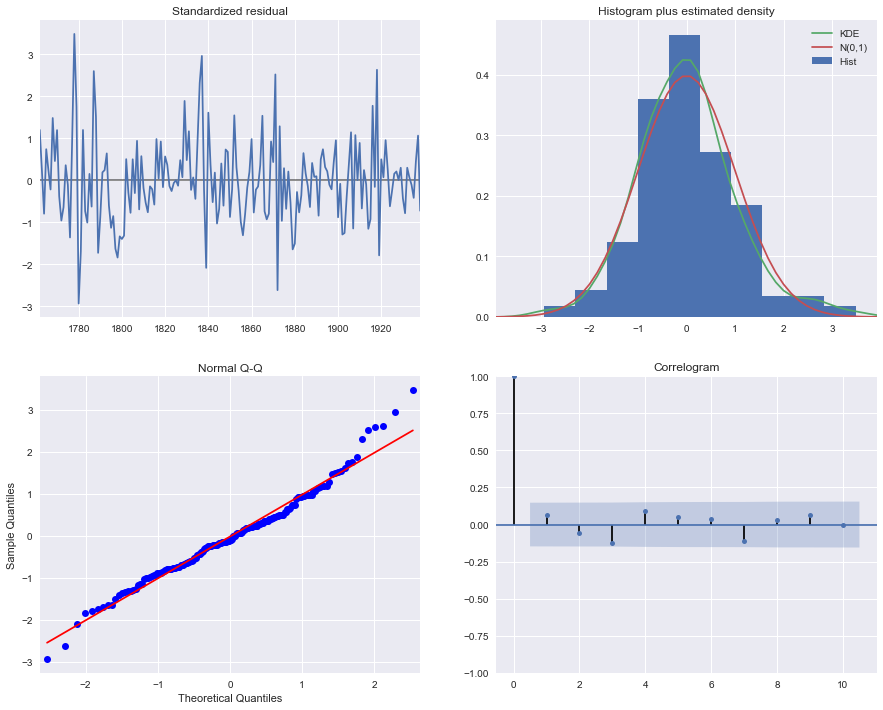

In [459]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

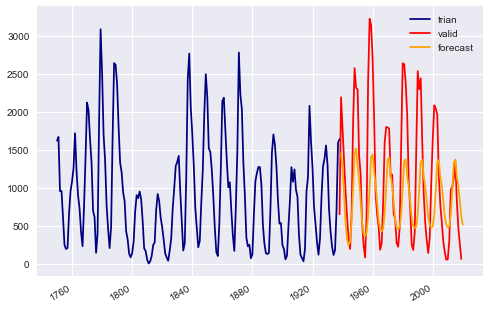

In [463]:
plt.plot(df_train_year,color = 'navy',label = 'trian')
plt.plot(df_test_year, color = 'r',label = 'valid')
best_model.forecast(len(df_test_year)).plot(color = 'orange',label = 'forecast')
plt.legend(loc = 'best')
plt.show()

In [23]:
#voorspelling doen mbbhv arma model?
#estimating the parameters of a model:
  #  --------------------------------------------
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data (p = het aantal autoregressive lags en staat hier op 1, q = het aantal moving average lags en staat hier op 0)
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)



#forecast]
---------------------
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()


#andere forecast
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0,end='2022')
plt.legend(fontsize=8)
plt.show()

In [ ]:
##################
#################
#model fitniss via aic en bic


# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

## Facebook Prophet Model